In [64]:
import tensorflow as tf
import matplotlib.pyplot as plot
from keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.models import Sequential
import tensorflow.keras.preprocessing.image

Скачиваем данные для обучения

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
def val_model(model):
    val_loss, val_acc = model.evaluate(test_images, test_labels, verbose=0)
    print('val_accuracy:', val_acc, 'val_loss', val_loss)

def compile_and_fit(model, opt=tf.keras.optimizers.Adam()):
    with tf.device("/GPU:0"):
        model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=0)
        val_model(model)
        return history

In [104]:
def init_plot(name=''):
    plot.rcParams["figure.figsize"] = (14, 6)
    figure, plot_arr = plot.subplots(1, 2)
    plot_arr[0].set_title("loss")
    plot_arr[1].set_title("accuracy")
    return plot_arr

def append_to_plot(plot_arr, history, lbl=''):
    plot_arr[0].plot(history.history["loss"], label=lbl)
    plot_arr[1].plot(history.history["accuracy"], label=lbl)

def finalize_plot(plot_arr):
    plot_arr[0].legend()
    plot_arr[1].legend()
    plot.show()
    plot.clf()
plot.clf()

<Figure size 1200x600 with 0 Axes>

Все оптимизаторы создаю с ```jit_compile=True``` просто чтобы ускорить оптимизацию под GPU, на работу оптимизаторов влиять не должно.

In [107]:
def optimizers():
    optimizers = [
        (tf.keras.optimizers.Adadelta(jit_compile=True), 'Default Adadelta'),
        (tf.keras.optimizers.Adadelta(jit_compile=True, learning_rate=0.003), 'Adadelta 3x l.r'),
        (tf.keras.optimizers.Adagrad(jit_compile=True), 'Default Adagrad'),
        (tf.keras.optimizers.Adam(jit_compile=True), 'Default Adam'),
        (tf.keras.optimizers.Adam(jit_compile=True, amsgrad=True), 'Adam with amsgrad'),
        (tf.keras.optimizers.Adamax(jit_compile=True), 'Default Adamax'),
        (tf.keras.optimizers.Adamax(jit_compile=True, use_ema=True), 'Adamax ema'),
        (tf.keras.optimizers.Ftrl(jit_compile=True), 'Default Ftrl'),
        (tf.keras.optimizers.Nadam(jit_compile=True), 'Default Nadam'),
        (tf.keras.optimizers.RMSprop(jit_compile=True), 'Default RMSprop'),
        (tf.keras.optimizers.RMSprop(jit_compile=True, centered=True), 'RMSprop centered'), # больше времени
        (tf.keras.optimizers.SGD(jit_compile=True), 'Default SGD'),
        (tf.keras.optimizers.SGD(jit_compile=True, nesterov=True), 'SGD nesterov')
    ]
    return optimizers

Default Adadelta
val_accuracy: 0.5084999799728394 val_loss 1.864300012588501
Adadelta 3x l.r
val_accuracy: 0.8123999834060669 val_loss 1.1478630304336548
Default Adagrad
val_accuracy: 0.8741999864578247 val_loss 0.5456212162971497
Default Adam
val_accuracy: 0.9771000146865845 val_loss 0.07336164265871048
Adam with amsgrad
val_accuracy: 0.9761000275611877 val_loss 0.07561025023460388
Default Adamax
val_accuracy: 0.9668999910354614 val_loss 0.1165434718132019
Adamax ema
val_accuracy: 0.9649999737739563 val_loss 0.1176869124174118
Default Ftrl
val_accuracy: 0.16539999842643738 val_loss 2.298309564590454
Default Nadam
val_accuracy: 0.9772999882698059 val_loss 0.07236269116401672
Default RMSprop
val_accuracy: 0.9781000018119812 val_loss 0.0718776062130928
RMSprop centered
val_accuracy: 0.9778000116348267 val_loss 0.06983182579278946
Default SGD
val_accuracy: 0.9110000133514404 val_loss 0.329487144947052
SGD nesterov
val_accuracy: 0.9120000004768372 val_loss 0.3221627473831177


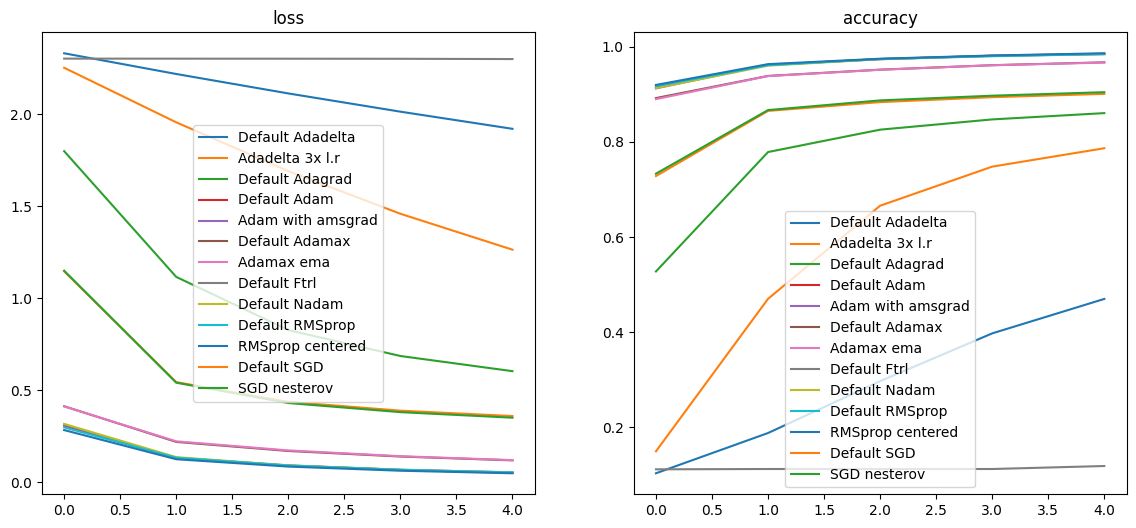

<Figure size 1400x600 with 0 Axes>

In [108]:
plot_arr = init_plot("Optimizers with default params")
for opt, descr in optimizers():
    print(descr)
    hist = compile_and_fit(Sequential([
        Flatten(),
        Dense(256, activation='relu'),
        Dense(10, activation='softmax'),
    ]),
    opt)
    append_to_plot(plot_arr, hist, descr)
finalize_plot(plot_arr)